
 Дані успішно завантажено!

 Дані підготовлені: категоріальні змінні закодовані, числові масштабовані.

 Дані розбиті: 80% - навчальна вибірка, 20% - тестова.



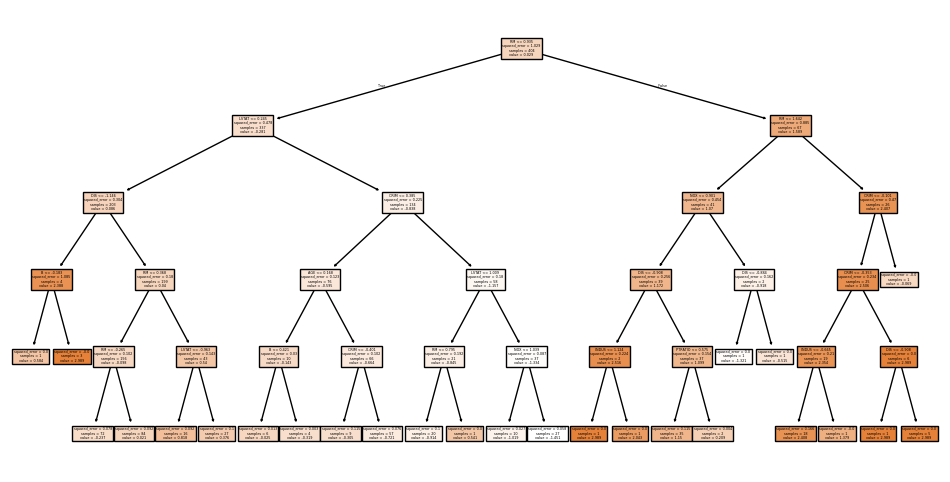

 Початковий MSE: 0.10133

 Крос-валідаційний MSE: 0.44188

 Підбір оптимальних параметрів...

 Найкращі параметри: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

 Оптимізована модель дерева навчена!

 Оптимізований MSE: 0.11068

 Важливість ознак:

Feature  Importance
     RM    0.639940
  LSTAT    0.197573
    DIS    0.067730
   CRIM    0.038886
    NOX    0.025747
PTRATIO    0.018249
    AGE    0.009148
      B    0.002727
     ZN    0.000000
  INDUS    0.000000
   CHAS    0.000000
    RAD    0.000000
    TAX    0.000000
 Підсумковий MSE після відбору ознак: 0.10967



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Завантаження власних даних
df = pd.read_csv("boston.csv")
print("\n Дані успішно завантажено!\n")

# 2. Попередня підготовка даних
le = LabelEncoder() 
df['CHAS'] = le.fit_transform(df['CHAS'])  
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)
print(" Дані підготовлені: категоріальні змінні закодовані, числові масштабовані.\n")

# Визначаємо вхідні ознаки та цільову змінну
X = df.drop(columns=['MEDV']) # вхідні ознаки 
y = df['MEDV'] # цільова змінна

# 3. Розбиття на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(" Дані розбиті: 80% - навчальна вибірка, 20% - тестова.\n")

# 4. Навчання дерева рішень
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# 5. Оцінка якості моделі
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions) # середньоквадратична похибка
print(f" Початковий MSE: {mse:.5f}\n")

# Крос-валідація
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f" Крос-валідаційний MSE: {-cv_scores.mean():.5f}\n")

# 6. Підбір оптимальних параметрів
print(" Підбір оптимальних параметрів...\n")
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f" Найкращі параметри: {grid_search.best_params_}\n")

# 7. Обрізка та перебудова дерева з оптимальними параметрами
optimized_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
optimized_model.fit(X_train, y_train)
print(" Оптимізована модель дерева навчена!\n")

# 8. Параметри "оптимальної моделі"
opt_predictions = optimized_model.predict(X_test)
opt_mse = mean_squared_error(y_test, opt_predictions)
print(f" Оптимізований MSE: {opt_mse:.5f}\n")

# 9. Визначення важливості ознак
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': optimized_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(" Важливість ознак:\n")
print(feature_importances.to_string(index=False))

# Відбір важливих ознак та повторне навчання
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

final_model = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
final_model.fit(X_train_selected, y_train)
final_predictions = final_model.predict(X_test_selected)
final_mse = mean_squared_error(y_test, final_predictions)
print(f" Підсумковий MSE після відбору ознак: {final_mse:.5f}\n")